# ** TRIPLET CHNAGE ** 

In [2]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np 
import matplotlib.patches as mpatches
import json
import pandas as pd
from datetime import datetime

In [3]:
plt.style.use("seaborn-ticks")

In [4]:
#whole genome doubled model
model = json.load(open("../Human_mutability_model/Model_2020_12_02_genomeWide.txt"))

In [29]:
file_path_afterSim = "data/dif_DNA/"
sim_name_afterSim = "Trial"
about_sim = "_cds_invariant50"
nTrials= 10 #
gen_to_use = 600000

In [30]:
DNA_dataDict = {}

#DifDNA800kgen trial 1-5
for index_tmp in range(1,int(nTrials)+1):
    file_name_exondict = sim_name_afterSim+str(index_tmp)+"_exon_insertion_dict.txt"
    file_name_dnaI = sim_name_afterSim+str(index_tmp)+"_DNA_gen0_cds.txt"
    file_name_dnaF = sim_name_afterSim+str(index_tmp)+"_DNA_final"+about_sim+"_"+str(gen_to_use)+".txt"
    file_name_dnamap = sim_name_afterSim+str(index_tmp)+"_DNA_map"+about_sim+".txt"
    
    file_object_exondict = json.loads(open(file_path_afterSim+file_name_exondict).readlines()[0])
    file_object_dnaI = open(file_path_afterSim+file_name_dnaI).readlines()[0]
    file_object_dnaF = open(file_path_afterSim+file_name_dnaF).readlines()[0]
    file_object_dnamap = open(file_path_afterSim+file_name_dnamap).readlines()[0]
    
    DNA_dataDict["Trial"+str(index_tmp)] = [file_object_dnaI, file_object_dnaF, file_object_dnamap, file_object_exondict]
    
#adding codonsI and codonsF list to the dna_data dictionary 
for trial_number in range(1,nTrials+1):
    trial_name = "Trial"+str(trial_number)

    current_DNAI = DNA_dataDict[trial_name][0]
    current_DNAF = DNA_dataDict[trial_name][1]
    current_codonsI = []
    current_codonsF = []

    tmp_nCodons = 0

    for exon_bounds_list in DNA_dataDict[trial_name][3].values():

        i = int(exon_bounds_list[0])+1

        tmp_exon_codons = int((int(exon_bounds_list[1]) - int(exon_bounds_list[0]))/3)
        tmp_nCodons += tmp_exon_codons


        while i <= int(exon_bounds_list[1]): 
            current_codonsI.append(current_DNAI[i:i+3])
            current_codonsF.append(current_DNAF[i:i+3])
            i+= 3
    
    DNA_dataDict[trial_name].extend([current_codonsI, current_codonsF])
    
#adding intronic triplet counts to the dictionary dna_datadict
for trial_number in range(1,nTrials+1):
    trial_name = "Trial"+str(trial_number)
    
    #turning the exon iseertion dictionary into an ordered list of bounds 
    all_exon_bounds_list = []
    for current_exon_bounds_list in DNA_dataDict[trial_name][3].values():
        all_exon_bounds_list.append(int(current_exon_bounds_list[0]))
        all_exon_bounds_list.append(int(current_exon_bounds_list[1]))    
    all_exon_bounds_list.sort()
    all_exon_bounds_list = [0]+all_exon_bounds_list[0:-1] #dont want the last bound as my dna end in exon 

    current_allIntronTriplets_initial  = []
    current_allIntronTriplets_final  = []

    for start_bound_index in range(0,len(all_exon_bounds_list),2): 
        start_bound = all_exon_bounds_list[start_bound_index]
        end_bound = all_exon_bounds_list[start_bound_index+1]
        for site in range(start_bound+1,end_bound-1): 

            tripletI = DNA_dataDict[trial_name][0][site-1:site+2]
            current_allIntronTriplets_initial.append(tripletI)

            tripletF = DNA_dataDict[trial_name][1][site-1:site+2]
            current_allIntronTriplets_final.append(tripletF)
        
    
    DNA_dataDict[trial_name].extend([current_allIntronTriplets_initial, current_allIntronTriplets_final])

DNA_dataDict["Trial"+str(index_tmp)] = 
0. file_object_dnaI, (dna string)
1. file_object_dnaF, (dna string)
2. file_object_dnamap, (dna map string)
3. file_object_exondict (dictionary) 
4. current_codonsI,  (list) 
5. current_codonsF (list) 
6. intronic triplet initial (list)
7. intronic triplet final (list) 

In [31]:
triplets = []
for key in model.keys(): 
    triplets.append(key)

In [32]:
#making the counts dictionary (proportion of the # that you started with --> proportional chnage )
intron_counts_dict = {}
for triplet in triplets: 
    
    intron_counts_dict[triplet] = []
    
    for trial_number in range(1,nTrials+1):
        trial_name = "Trial"+str(trial_number)
        
        triplet_countI = DNA_dataDict[trial_name][6].count(triplet)
        triplet_countF = DNA_dataDict[trial_name][7].count(triplet)
        
        intron_counts_dict[triplet].append((triplet_countF- triplet_countI)/triplet_countI) 

In [19]:
## printig intron counts to dict for later use (in case) 
# timestamp = datetime.now().strftime("%Y/%m/%d_%H:%M").replace("/", "_").replace(":", "_")
# text_file = open("data/dif_DNA/IntronCountsDictionary_{t}.txt".format(t=timestamp), "w")
# n = text_file.write(json.dumps(intron_counts_dict))
# text_file.close()

In [33]:
# MAKING THE MENA AND STD LISTS 
triplet_muts_intron = []
triplet_chnage_mean_intron = []
triplet_chnage_std_intron = []

for triplet in triplets: 
    triplet_muts_intron.append(model[triplet][0])        
    triplet_chnage_mean_intron.append(np.mean(intron_counts_dict[triplet]))
    triplet_chnage_std_intron.append(np.std(intron_counts_dict[triplet])/np.sqrt(nTrials))

In [34]:
triplet_muts_intron_log = []
for mut in triplet_muts_intron: 
    triplet_muts_intron_log.append(np.log(mut))

In [35]:
triplet_muts_intron_log10 = []
for mut in triplet_muts_intron: 
    triplet_muts_intron_log10.append(np.log10(mut))

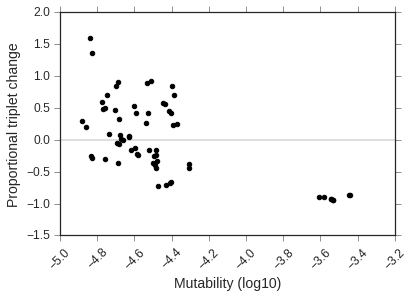

In [38]:
plt.scatter(triplet_muts_intron_log10,triplet_chnage_mean_intron, color = "black")
plt.axhline(y = 0, linewidth = 0.25, color = "k")
plt.xticks(rotation=45, size = 12)
plt.yticks(size = 12)
plt.xlabel("Mutability (log10)", size = 14)
plt.ylabel("Proportional triplet change", size = 14)
# plt.xlim(left = 0, right = 0.0004)

#errobars
# plt.errorbar(triplet_muts_intron_log10, triplet_chnage_mean_intron, yerr = np.array(triplet_chnage_std_intron), ecolor = "grey", ls = "None")

plt.show()
# timestamp = datetime.now().strftime("%Y/%m/%d_%H:%M:%S").replace("/", "_").replace(":", "_")
# plt.tight_layout()
# plt.savefig("plots/Scatter_{t}_{l}Mbp_{p}gens_log.png".format(p = gen_to_use, l = str(100000/1000000),t = timestamp))

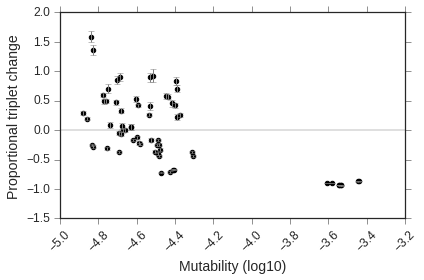

In [17]:
plt.scatter(triplet_muts_intron_log10,triplet_chnage_mean_intron, color = "black")
plt.axhline(y = 0, linewidth = 0.25, color = "k")
plt.xticks(rotation=45, size = 12)
plt.yticks(size = 12)
plt.xlabel("Mutability (log10)", size = 14)
plt.ylabel("Proportional triplet change", size = 14)
# plt.xlim(left = 0, right = 0.0004)

#errobars
# plt.errorbar(triplet_muts_intron_log10, triplet_chnage_mean_intron, yerr = np.array(triplet_chnage_std_intron), ecolor = "grey", ls = "None")

plt.show()
# timestamp = datetime.now().strftime("%Y/%m/%d_%H:%M:%S").replace("/", "_").replace(":", "_")
# plt.tight_layout()
# plt.savefig("plots/Scatter_{t}_{l}Mbp_{p}gens_log.png".format(p = gen_to_use, l = str(100000/1000000),t = timestamp))

# ** appendix ** 

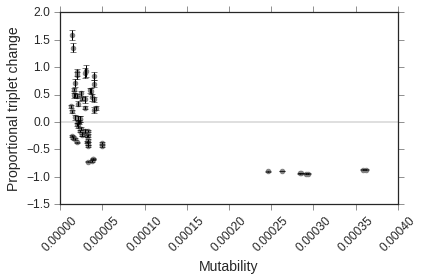

In [104]:
plt.scatter(triplet_muts_intron,triplet_chnage_mean_intron, color = "grey")
plt.axhline(y = 0, linewidth = 0.25, color = "k")
plt.xticks(rotation=45, size = 12)
plt.yticks(size = 12)
plt.xlabel("Mutability", size = 14)
plt.ylabel("Proportional triplet change", size = 14)
plt.xlim(left = 0, right = 0.0004)

#errobars
plt.errorbar(triplet_muts_intron, triplet_chnage_mean_intron, yerr = np.array(triplet_chnage_std_intron), ecolor = "black", ls = "None")

plt.show()
# timestamp = datetime.now().strftime("%Y/%m/%d_%H:%M:%S").replace("/", "_").replace(":", "_")
# plt.tight_layout()
# plt.savefig("plots/Scatter_{t}_{l}Mbp_{p}gens.png".format(p = gen_to_use, l = str(100000/1000000),t = timestamp))

** ok lets try breaking the x axis so we capture all interesting trends ** 

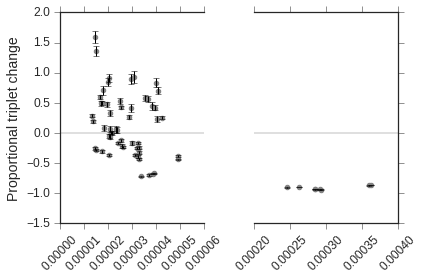

In [102]:
f, (ax, ax2) = plt.subplots(1, 2, sharey=True)

# plot the same data on both axes
ax.scatter(triplet_muts_intron,triplet_chnage_mean_intron, color = "grey", edgecolor = "grey")
ax2.scatter(triplet_muts_intron,triplet_chnage_mean_intron, color = "grey", edgecolor = "grey")

#adding the horizontal line
ax.axhline(y = 0, linewidth = 0.25, color = "k")
ax2.axhline(y = 0, linewidth = 0.25, color = "k")

# zoom-in / limit the view to different portions of the data
ax.set_xlim(0, 0.00006)  # non-cpgs
ax2.set_xlim(0.0002,0.0004)  # cpgs

# hide the spines between ax and ax2
ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
# hide the ticks between ax and ax2 and icnrease font size 
ax.tick_params(right = False, labelsize = 12)  # don't put tick labels on the right
ax2.tick_params(left = False, labelsize = 12)  # don't put tick labels on the left

#rotate the ticks (in a subplot)
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
for tick in ax2.get_xticklabels():
    tick.set_rotation(45)
    
# Set common labels
ax.set_ylabel('Proportional triplet change', fontsize = 14)

#adding errorbars
#deafults to include connecting lines, ls="non" remove thelines so only 
ax.errorbar(triplet_muts_intron,triplet_chnage_mean_intron,yerr = np.array(triplet_chnage_std_intron), ls = "none", color = "k")
ax2.errorbar(triplet_muts_intron,triplet_chnage_mean_intron,yerr = np.array(triplet_chnage_std_intron), ls = "none", color = "k")

plt.show()
# timestamp = datetime.now().strftime("%Y/%m/%d_%H:%M:%S").replace("/", "_").replace(":", "_")
# plt.tight_layout()
# plt.savefig("plots/Scatter_{t}_{l}Mbp_{p}gens_CpGsep.png".format(p = gen_to_use, l = str(100000/1000000),t = timestamp))